Importing all necessary modules


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm
from sklearn.utils import resample
import seaborn as sns
import math

Import data as df

In [2]:
df = pd.read_csv('1full.csv')

Plot rating distribution, each bin contains a 20 points range

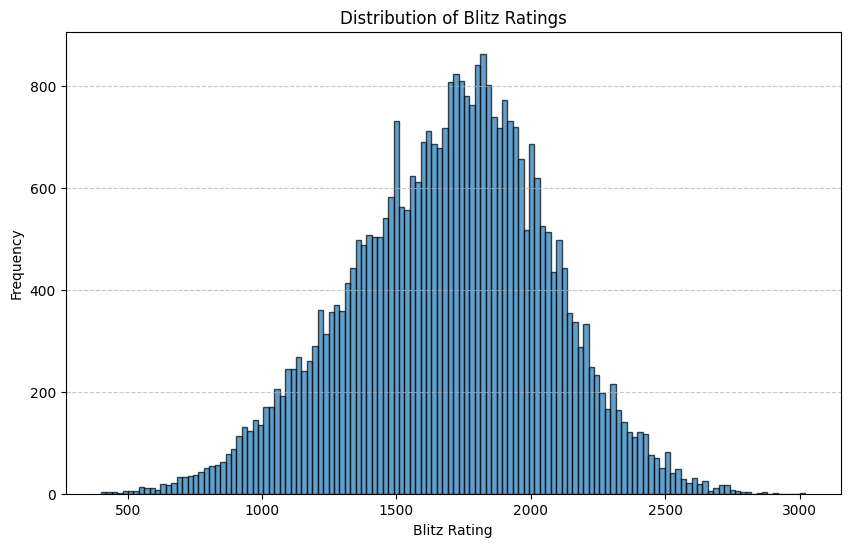

In [3]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['blitz_rating'], bins=130, edgecolor='black', alpha=0.7)
plt.title('Distribution of Blitz Ratings')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [4]:
mean_rating = df['blitz_rating'].mean()

print(f"The mean blitz rating is: {mean_rating}")

std = df['blitz_rating'].std()

print("Standard Deviation (Sample):", std)

The mean blitz rating is: 1694.6732451158564
Standard Deviation (Sample): 368.67762083228905


Need to sample based on the lichess distribution

![Sample Image](../images/lichessDistribution.png)


In [5]:
rating_min = df['blitz_rating'].min()
rating_max = df['blitz_rating'].max()

bins = np.arange(rating_min, rating_max, 20)
labels = [f"{int(bins[i])}-{int(bins[i+1]-1)}" for i in range(len(bins)-1)]
df['rating_bin'] = pd.cut(df['blitz_rating'], bins=bins, labels=labels)

print(df['rating_bin'].value_counts())



rating_bin
1800-1819    869
1740-1759    849
1700-1719    846
1900-1919    789
1840-1859    784
            ... 
2920-2939      0
2940-2959      0
2960-2979      0
2980-2999      0
3000-3019      0
Name: count, Length: 131, dtype: int64


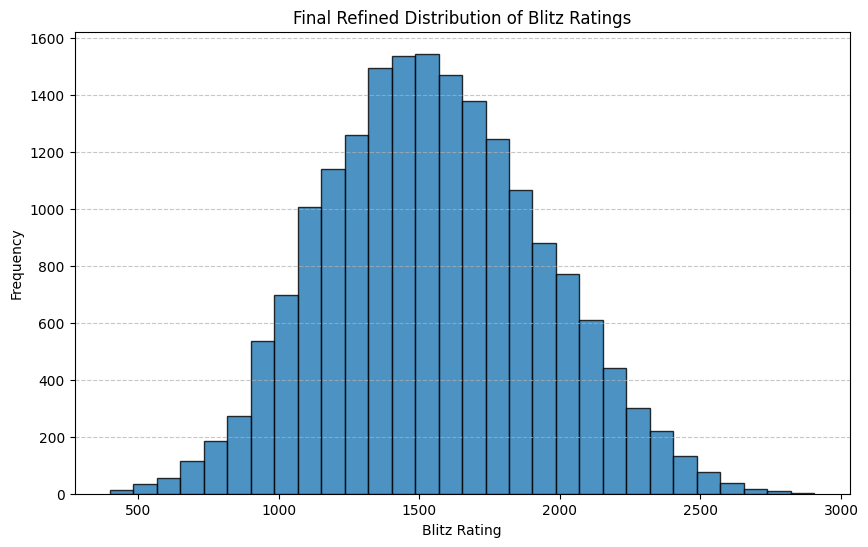

In [6]:


peak_range = df[(df['blitz_rating'] >= 1200) & (df['blitz_rating'] <= 1300)]
to_trim_peak = int(len(peak_range) * 0.12) 
df = df.drop(peak_range.sample(to_trim_peak, random_state=42).index)

peak_range = df[(df['blitz_rating'] >= 1300) & (df['blitz_rating'] <= 1400)]
to_trim_peak = int(len(peak_range) * 0.23)  
df = df.drop(peak_range.sample(to_trim_peak, random_state=42).index)

peak_range = df[(df['blitz_rating'] >= 1400) & (df['blitz_rating'] <= 1500)]
to_trim_peak = int(len(peak_range) * 0.3) 
df = df.drop(peak_range.sample(to_trim_peak, random_state=42).index)

peak_range = df[(df['blitz_rating'] >= 1500) & (df['blitz_rating'] <= 1600)]
to_trim_peak = int(len(peak_range) * 0.4)  
df = df.drop(peak_range.sample(to_trim_peak, random_state=42).index)

peak_range = df[(df['blitz_rating'] >= 1600) & (df['blitz_rating'] <= 1700)]
to_trim_peak = int(len(peak_range) * 0.5)  
df = df.drop(peak_range.sample(to_trim_peak, random_state=42).index)

peak_range = df[(df['blitz_rating'] >= 1700) & (df['blitz_rating'] <= 1800)]
to_trim_peak = int(len(peak_range) * 0.61)  
df = df.drop(peak_range.sample(to_trim_peak, random_state=42).index)

peak_range = df[(df['blitz_rating'] >= 1800) & (df['blitz_rating'] <= 1900)]
to_trim_peak = int(len(peak_range) * 0.66)  
df = df.drop(peak_range.sample(to_trim_peak, random_state=42).index)

peak_range = df[(df['blitz_rating'] >= 1900) & (df['blitz_rating'] <= 2000)]
to_trim_peak = int(len(peak_range) * 0.69)  
df = df.drop(peak_range.sample(to_trim_peak, random_state=42).index)

peak_range = df[(df['blitz_rating'] >= 2000) & (df['blitz_rating'] <= 2100)]
to_trim_peak = int(len(peak_range) * 0.67)  
df = df.drop(peak_range.sample(to_trim_peak, random_state=42).index)

peak_range = df[(df['blitz_rating'] >= 2100) & (df['blitz_rating'] <= 2200)]
to_trim_peak = int(len(peak_range) * 0.65)  
df = df.drop(peak_range.sample(to_trim_peak, random_state=42).index)

peak_range = df[(df['blitz_rating'] >= 2200) & (df['blitz_rating'] <= 2300)]
to_trim_peak = int(len(peak_range) * 0.65)  
df = df.drop(peak_range.sample(to_trim_peak, random_state=42).index)

peak_range = df[(df['blitz_rating'] >= 2300) & (df['blitz_rating'] <= 2400)]
to_trim_peak = int(len(peak_range) * 0.58)  
df = df.drop(peak_range.sample(to_trim_peak, random_state=42).index)

peak_range = df[(df['blitz_rating'] > 2400)]
to_trim_peak = int(len(peak_range) * 0.65)  
df = df.drop(peak_range.sample(to_trim_peak, random_state=42).index)



plt.figure(figsize=(10, 6))
plt.hist(df['blitz_rating'], bins=30, alpha=0.8, edgecolor='black')
plt.title('Final Refined Distribution of Blitz Ratings')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [7]:
mean_rating = df['blitz_rating'].mean()

print(f"The mean blitz rating is: {mean_rating}")

std = df['blitz_rating'].std()

print("Standard Deviation (Sample):", std)

The mean blitz rating is: 1550.8367182028767
Standard Deviation (Sample): 386.12379333356773


In [8]:
df.to_csv('1550mean.csv', index=False)